In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median, gaussian
from skimage.morphology import disk
from skimage.util import random_noise
from skimage.transform import rescale

In [2]:
bright = cv2.imread("img/6.jpg")
dark = cv2.imread("img/7.jpg")

In [3]:
brightLAB = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB) 
darkLAB = cv2.cvtColor(dark, cv2.COLOR_BGR2LAB)
brightYCB = cv2.cvtColor(bright, cv2.COLOR_BGR2YCrCb) 
darkYCB = cv2.cvtColor(dark, cv2.COLOR_BGR2YCrCb)
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV) 
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)

In [4]:
bgr = [40, 158, 16]
thresh = 40

In [5]:
minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr [2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr [2] + thresh])

In [6]:
maskBGR = cv2.inRange(bright, minBGR, maxBGR)
resultBGR = cv2.bitwise_and(bright, bright, mask=maskBGR)

In [7]:
hav = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2HSV)[0][0]
minHSV = np.array([hav[0] - thresh, hav[1] - thresh, hav[2] - thresh])
maxHSV = np.array([hav[0] + thresh, hav[1] + thresh, hav[2] + thresh])

In [8]:
maskHSV = cv2.inRange(brightHSV, minHSV, maxHSV)
resultHSV = cv2.bitwise_and(brightHSV, brightHSV, mask=maskHSV)

In [9]:
ycb = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2YCrCb)[0][0] 
minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])

In [10]:
maskYCB = cv2.inRange(brightYCB, minYCB, maxYCB)
resultYCB = cv2.bitwise_and(brightYCB, brightYCB, mask=maskYCB)

In [11]:
lab = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2LAB)[0][0]
minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])

In [12]:
maskLAB = cv2.inRange(brightLAB, minLAB, maxLAB)
resultLAB = cv2.bitwise_and(brightLAB, brightLAB, mask=maskLAB)

In [13]:
cv2.imshow("Result BGR", resultBGR) 
cv2.imshow("Result HSV", resultHSV)
cv2.imshow("Result YCB", resultYCB)
cv2.imshow("Output LAB", resultLAB)
cv2.waitKey(0)
cv2.destroyAllWindwos ()

KeyboardInterrupt: 

In [16]:
img1 = cv2.imread('img/3.jpg', cv2.IMREAD_COLOR) 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
img2 = cv2.imread('img/2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

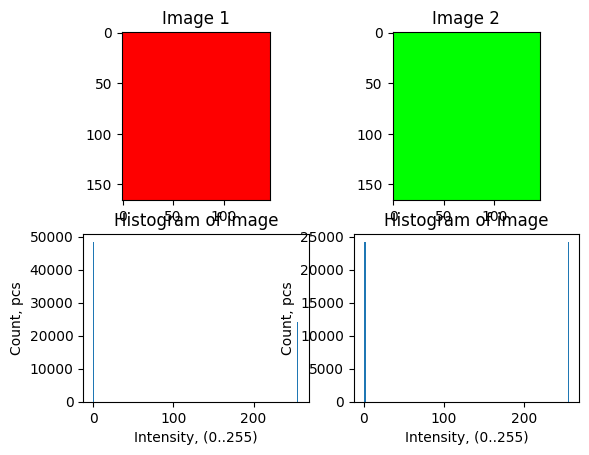

In [18]:
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.title('Image 1')

plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.title('Image 2')

plt.subplot(2, 2, 3)
plt.hist(img1.ravel(), 256, [0, 256])
plt.xlabel('Intensity, (0..255)')
plt.ylabel('Count, pcs')
plt.title('Histogram of image')

plt.subplot(2, 2, 4)
plt.hist(img2.ravel(), 256, [0, 256])
plt.xlabel('Intensity, (0..255)')
plt.ylabel('Count, pcs')

plt.title('Histogram of image')
plt.show()

In [26]:
img1 = cv2.imread('img/2.jpg', cv2.IMREAD_GRAYSCALE)
img1 = rescale(img1, 0.15)

img_ns = random_noise(img1, mode='speckle', mean=0.1)
img_m3 = median(img_ns, disk(3))
img_m9 = median(img_ns, disk(11))

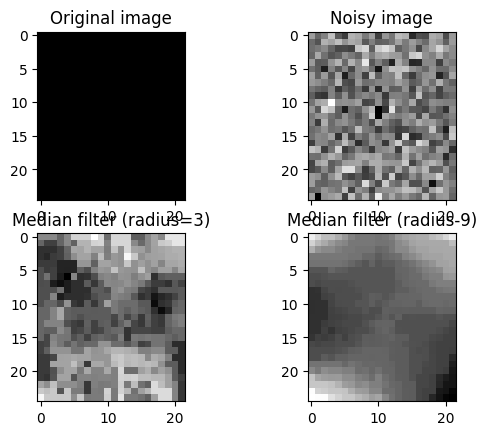

In [31]:
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(img_ns, cmap='gray')
plt.title('Noisy image')
plt.subplot(2, 2, 3)
plt.imshow(img_m3, cmap='gray')
plt.title('Median filter (radius=3)')
plt.subplot(2, 2, 4)
plt.imshow(img_m9, cmap='gray')
plt.title('Median filter (radius-9)')
plt.show()

In [32]:
img_g1 = gaussian(img_ns, 1)
img_g3 = gaussian(img_ns, 3)

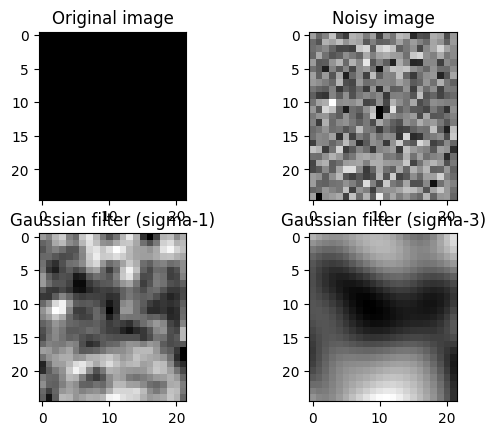

In [36]:
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(img_ns, cmap='gray')
plt.title('Noisy image')
plt.subplot(2, 2, 3)
plt.imshow(img_g1, cmap='gray')
plt.title('Gaussian filter (sigma-1)')
plt.subplot(2, 2, 4)
plt.imshow(img_g3, cmap='gray')
plt.title('Gaussian filter (sigma-3)')
plt.show()

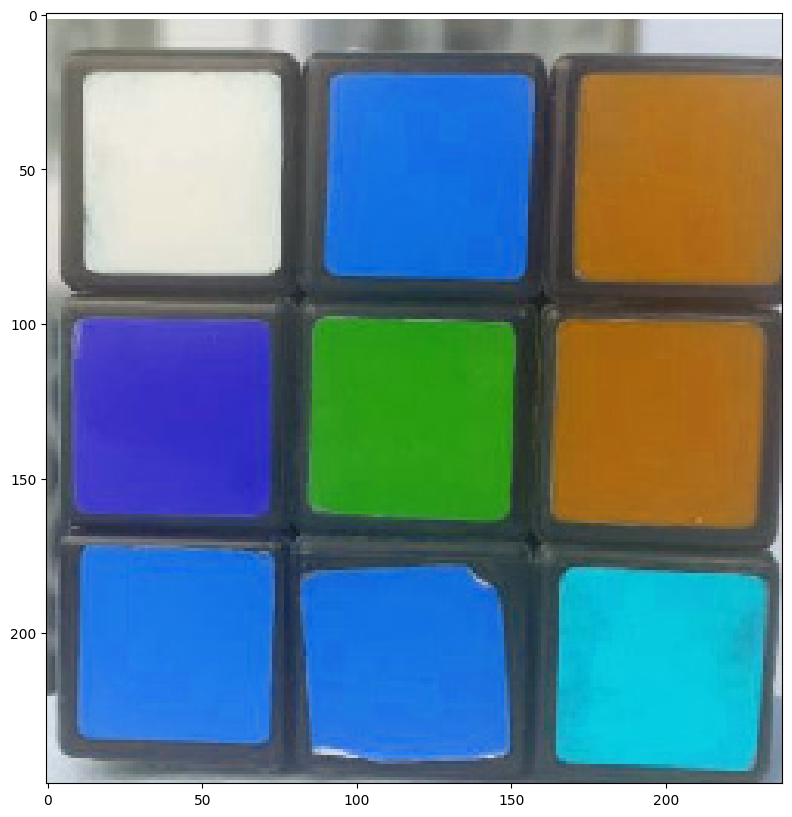

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(bright)
plt.show()